# **유동인구 + 음식물 쓰레기 EDA**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = True
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
foot = pd.read_csv('음식물+유동인구+휴일+카드+날씨.csv', encoding='cp949')

foot

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_cnt마트/슈퍼마켓,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10)
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,2199680,466,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,354993,859,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,2730942,864,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,687498,791,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,2572840,1836,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,13624338,1982,52547555,24.9,0.0,75.1,1004.0,19.91,0.0,5.3
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,20933190,900,28210604,24.9,0.0,75.1,1004.0,19.91,0.0,5.3
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,4176912,423,17679746,24.0,0.0,94.4,998.0,16.37,0.0,5.6
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,13545991,669,42071373,24.0,0.0,94.4,998.0,16.37,0.0,5.6


In [3]:
foot.columns

Index(['base_date', 'city', 'emd_nm', '0여성notvisit', '0여성visit', '0남성notvisit',
       '0남성visit', '10여성notvisit', '10여성visit', '10남성notvisit', '10남성visit',
       '20여성notvisit', '20여성visit', '20남성notvisit', '20남성visit',
       '30여성notvisit', '30여성visit', '30남성notvisit', '30남성visit',
       '40여성notvisit', '40여성visit', '40남성notvisit', '40남성visit',
       '50여성notvisit', '50여성visit', '50남성notvisit', '50남성visit',
       '60여성notvisit', '60여성visit', '60남성notvisit', '60남성visit',
       '70여성notvisit', '70여성visit', '70남성notvisit', '70남성visit',
       '80여성notvisit', '80여성visit', '80남성notvisit', '80남성visit', '장기체류외국인',
       '단기체류외국인', '배출건수', '배출량', 'dayoff', 'use_cnt배달', 'use_amt배달',
       'use_cnt식품', 'use_amt식품', 'use_cnt농축수산물', 'use_amt농축수산물',
       'use_cnt마트/슈퍼마켓', 'use_amt마트/슈퍼마켓', '평균기온(°C)', '일강수량(mm)',
       '평균 상대습도(%)', '평균 현지기압(hPa)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)',
       '평균 전운량(1/10)'],
      dtype='object')

In [4]:
# foot.isnull().sum()   # 결측치 없음

In [5]:
foot['base_year_month'] = foot['base_date'].str[:4] + '년 ' + foot['base_date'].str[5:7] + '월'

foot

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_cnt마트/슈퍼마켓,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),base_year_month
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,466,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,859,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,864,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,2018년 01월
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,791,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,1836,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,1982,52547555,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2021년 06월
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,900,28210604,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2021년 06월
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,423,17679746,24.0,0.0,94.4,998.0,16.37,0.0,5.6,2021년 06월
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,669,42071373,24.0,0.0,94.4,998.0,16.37,0.0,5.6,2021년 06월


In [6]:
foot['total_foot'] = (foot['0여성notvisit'] + foot['0여성visit'] + foot['0남성notvisit'] + foot['0남성visit'] \
                     + foot['10여성notvisit'] + foot['10여성visit'] + foot['10남성notvisit'] + foot['10남성visit'] \
                     + foot['20여성notvisit'] + foot['20여성visit'] + foot['20남성notvisit'] + foot['20남성visit'] \
                     + foot['30여성notvisit'] + foot['30여성visit'] + foot['30남성notvisit'] + foot['30남성visit'] \
                     + foot['40여성notvisit'] + foot['40여성visit'] + foot['40남성notvisit'] + foot['40남성visit'] \
                     + foot['50여성notvisit'] + foot['50여성visit'] + foot['50남성notvisit'] + foot['50남성visit'] \
                     + foot['60여성notvisit'] + foot['60여성visit'] + foot['60남성notvisit'] + foot['60남성visit'] \
                     + foot['70여성notvisit'] + foot['70여성visit'] + foot['70남성notvisit'] + foot['70남성visit'] \
                     + foot['80여성notvisit'] + foot['80여성visit'] + foot['80남성notvisit'] + foot['80남성visit']) / 24

foot

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),base_year_month,total_foot
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월,21500.905588
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월,20558.295217
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,2018년 01월,22218.036783
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월,12850.043121
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,2018년 01월,22843.733038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,52547555,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2021년 06월,37051.947121
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,28210604,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2021년 06월,34805.571958
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,17679746,24.0,0.0,94.4,998.0,16.37,0.0,5.6,2021년 06월,11750.572100
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,42071373,24.0,0.0,94.4,998.0,16.37,0.0,5.6,2021년 06월,33609.553538


In [7]:
len(list(foot['emd_nm'].unique()))   # 음식물 쓰레기 데이터에는 '우도면'이 없음

41

In [8]:
foot_month_dong = foot.groupby(['emd_nm', 'base_year_month']).sum().reset_index()

foot_month_dong

,emd_nm,base_year_month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,...,use_cnt마트/슈퍼마켓,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),total_foot
0,건입동,2018년 01월,260385.7940,206740.1645,239388.6474,208782.6978,267289.3112,230219.3788,300898.6225,246640.7241,...,17547,613458055,151.8,58.0,2082.3,31671.3,184.41,16.6,239.8,440783.972246
1,건입동,2018년 02월,247922.2602,200805.1089,231624.3147,186407.0065,254573.1866,223501.3665,291121.1777,219772.8505,...,15277,638040404,152.8,86.6,1688.4,28594.2,286.47,20.9,174.9,399591.776467
2,건입동,2018년 03월,227317.5895,198993.6020,209732.2041,142514.3399,233265.1840,219592.0336,263301.4468,167397.2835,...,17327,571735294,354.8,118.0,2218.4,31542.6,450.58,0.0,148.0,423259.765362
3,건입동,2018년 04월,255897.6800,179885.6638,193813.0986,175707.1962,265448.3755,198583.9267,243494.7449,206898.7605,...,18584,609269434,475.5,112.5,2047.5,30415.2,550.16,0.0,155.3,417116.982100
4,건입동,2018년 05월,264277.2246,209902.3447,193126.1088,189993.7174,273757.3888,232091.8977,242697.5446,223955.4756,...,19218,645346953,591.4,98.8,2343.9,31299.7,543.09,0.0,209.9,430880.507042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,효돈동,2021년 02월,71916.2101,24198.5129,66799.8527,19428.8283,57738.0757,18753.4763,74891.3493,22723.6976,...,3724,206144552,140.4,10.4,895.9,13184.4,0.00,0.0,42.8,78491.277804
1630,효돈동,2021년 03월,78590.1622,23665.0207,70918.7164,17537.4057,63258.0882,18163.7402,79462.5968,20381.0226,...,4713,256734207,235.4,78.0,1251.9,17187.2,0.00,0.0,81.7,95321.175575
1631,효돈동,2021년 04월,78362.1367,22064.0046,69440.8122,15450.6996,62887.9984,16999.1410,77881.6317,18008.1694,...,4629,219711694,261.8,63.6,1171.2,16171.0,0.00,0.0,86.1,91336.336937
1632,효돈동,2021년 05월,78775.8601,23878.8661,73394.6970,16796.7083,63271.3108,18447.2661,82273.6895,19583.5849,...,4526,214317332,307.3,58.7,1180.2,16068.3,0.00,0.0,87.8,92438.931504


In [9]:
foot_month_dong.tail(50)

,emd_nm,base_year_month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,...,use_cnt마트/슈퍼마켓,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),total_foot
1584,화북동,2020년 11월,1.459167e+06,387087.0653,1.365768e+06,424561.0228,1.168739e+06,296779.6198,1.607071e+06,490669.6355,...,46685,1379315097,406.0,28.2,1820.7,28617.5,262.86,0.0,155.1,1.005132e+06
1585,화북동,2020년 12월,1.658087e+06,360354.4251,1.446199e+06,339940.9533,1.327955e+06,277015.7107,1.702920e+06,394409.7200,...,50905,1531602659,220.1,29.5,1779.9,29684.8,184.69,3.7,202.0,1.063249e+06
1586,화북동,2021년 01월,1.615879e+06,362426.2670,1.349905e+06,300647.9010,1.294589e+06,278130.1976,1.591227e+06,348617.6347,...,48099,1376169619,202.2,104.9,1791.1,28609.9,208.81,11.8,186.6,1.027172e+06
1587,화북동,2021년 02월,9.918558e+05,276478.1804,8.308743e+05,206703.3879,7.946122e+05,212658.2099,9.793753e+05,239828.3419,...,27717,841300071,180.3,27.9,1077.7,18336.2,200.56,2.0,107.3,6.523431e+05
1588,화북동,2021년 03월,1.555115e+06,422245.5216,1.373606e+06,551229.3604,1.246169e+06,323806.7249,1.618745e+06,637388.6794,...,47839,1349904879,386.9,81.1,2116.1,31535.3,453.55,0.0,183.8,1.109019e+06
1589,화북동,2021년 04월,1.438372e+06,389184.4710,1.419028e+06,446666.9664,1.151200e+06,298428.9690,1.669128e+06,516292.6274,...,44476,1371544413,447.0,45.6,1830.7,29481.0,562.52,0.0,161.3,1.035928e+06
1590,화북동,2021년 05월,1.254528e+06,311296.2935,1.174547e+06,242289.2460,1.004690e+06,239144.7138,1.382385e+06,280261.5754,...,38243,1144502552,465.7,90.6,1660.6,24179.5,469.27,0.0,156.5,8.504956e+05
1591,화북동,2021년 06월,1.334670e+06,386917.2056,1.246746e+06,492372.8635,1.069337e+06,297162.5500,1.468605e+06,568991.4103,...,43274,1243130546,630.7,122.4,2074.3,27154.5,521.07,0.0,189.1,9.638015e+05
1592,효돈동,2018년 01월,1.105226e+05,57592.1831,1.606597e+05,54947.5754,1.058049e+05,64746.5533,1.845097e+05,65319.7823,...,6699,332910766,182.3,63.7,2149.5,31500.1,0.00,0.0,0.0,1.693188e+05
1593,효돈동,2018년 02월,1.123083e+05,44544.5201,1.343428e+05,50514.0952,1.073238e+05,49781.5677,1.540782e+05,59742.1143,...,6301,307108186,176.9,10.5,1798.5,28453.8,0.00,0.0,0.0,1.518397e+05


## **유동인구 반영 음식물 쓰레기 배출건수/량**

In [10]:
# 행정동 리스트
dong_list = list(foot_month_dong.emd_nm.unique())

dong_list

['건입동',
 '구좌읍',
 '남원읍',
 '노형동',
 '대륜동',
 '대정읍',
 '대천동',
 '도두동',
 '동홍동',
 '봉개동',
 '삼도1동',
 '삼도2동',
 '삼양동',
 '서홍동',
 '성산읍',
 '송산동',
 '아라동',
 '안덕면',
 '애월읍',
 '연동',
 '영천동',
 '예래동',
 '오라동',
 '외도동',
 '용담1동',
 '용담2동',
 '이도1동',
 '이도2동',
 '이호동',
 '일도1동',
 '일도2동',
 '정방동',
 '조천읍',
 '중문동',
 '중앙동',
 '천지동',
 '표선면',
 '한경면',
 '한림읍',
 '화북동',
 '효돈동']

In [11]:
trash_total = pd.read_csv('2018~2021년 행정동-월별 음식물 쓰레기 배출.csv')

trash_total

,emd_nm,base_year_month,base_year_month(sub),em_cnt,em_g,pay_amt
0,건입동,2018년 01월,2018년 1월,18416,45646550,1364804
1,건입동,2018년 02월,2018년 2월,17491,42953550,1284216
2,건입동,2018년 03월,2018년 3월,19396,46422450,1387853
3,건입동,2018년 04월,2018년 4월,19179,42438700,1268331
4,건입동,2018년 05월,2018년 5월,21277,44893300,1341494
...,...,...,...,...,...,...
1629,효돈동,2021년 02월,2021년 2월,6795,26128400,782163
1630,효돈동,2021년 03월,2021년 3월,7492,26845400,803505
1631,효돈동,2021년 04월,2021년 4월,7399,25200200,754194
1632,효돈동,2021년 05월,2021년 5월,6682,21724850,650080


In [12]:
foot_total_trash = pd.merge(foot_month_dong, trash_total, how='left', on=['base_year_month', 'emd_nm'])
# foot_total_trash = pd.concat([foot_month_dong, trash_total], axis=1)   # 이렇게 하면 NaN 행 생김

# 파생변수 'em_cnt/total_foot(1인당 배출건수)' 'em_g/total_foot(1인당 배출량)' 생성
foot_total_trash['em_cnt/total_foot'] = foot_total_trash['em_cnt'] / foot_total_trash['total_foot']
foot_total_trash['em_g/total_foot'] = foot_total_trash['em_g'] / foot_total_trash['total_foot']

foot_total_trash

,emd_nm,base_year_month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,...,합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),total_foot,base_year_month(sub),em_cnt,em_g,pay_amt,em_cnt/total_foot,em_g/total_foot
0,건입동,2018년 01월,260385.7940,206740.1645,239388.6474,208782.6978,267289.3112,230219.3788,300898.6225,246640.7241,...,184.41,16.6,239.8,440783.972246,2018년 1월,18416,45646550,1364804,0.041780,103.557645
1,건입동,2018년 02월,247922.2602,200805.1089,231624.3147,186407.0065,254573.1866,223501.3665,291121.1777,219772.8505,...,286.47,20.9,174.9,399591.776467,2018년 2월,17491,42953550,1284216,0.043772,107.493579
2,건입동,2018년 03월,227317.5895,198993.6020,209732.2041,142514.3399,233265.1840,219592.0336,263301.4468,167397.2835,...,450.58,0.0,148.0,423259.765362,2018년 3월,19396,46422450,1387853,0.045825,109.678391
3,건입동,2018년 04월,255897.6800,179885.6638,193813.0986,175707.1962,265448.3755,198583.9267,243494.7449,206898.7605,...,550.16,0.0,155.3,417116.982100,2018년 4월,19179,42438700,1268331,0.045980,101.742921
4,건입동,2018년 05월,264277.2246,209902.3447,193126.1088,189993.7174,273757.3888,232091.8977,242697.5446,223955.4756,...,543.09,0.0,209.9,430880.507042,2018년 5월,21277,44893300,1341494,0.049380,104.189675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,효돈동,2021년 02월,71916.2101,24198.5129,66799.8527,19428.8283,57738.0757,18753.4763,74891.3493,22723.6976,...,0.00,0.0,42.8,78491.277804,2021년 2월,6795,26128400,782163,0.086570,332.882847
1630,효돈동,2021년 03월,78590.1622,23665.0207,70918.7164,17537.4057,63258.0882,18163.7402,79462.5968,20381.0226,...,0.00,0.0,81.7,95321.175575,2021년 3월,7492,26845400,803505,0.078597,281.631021
1631,효돈동,2021년 04월,78362.1367,22064.0046,69440.8122,15450.6996,62887.9984,16999.1410,77881.6317,18008.1694,...,0.00,0.0,86.1,91336.336937,2021년 4월,7399,25200200,754194,0.081008,275.905525
1632,효돈동,2021년 05월,78775.8601,23878.8661,73394.6970,16796.7083,63271.3108,18447.2661,82273.6895,19583.5849,...,0.00,0.0,87.8,92438.931504,2021년 5월,6682,21724850,650080,0.072286,235.018402


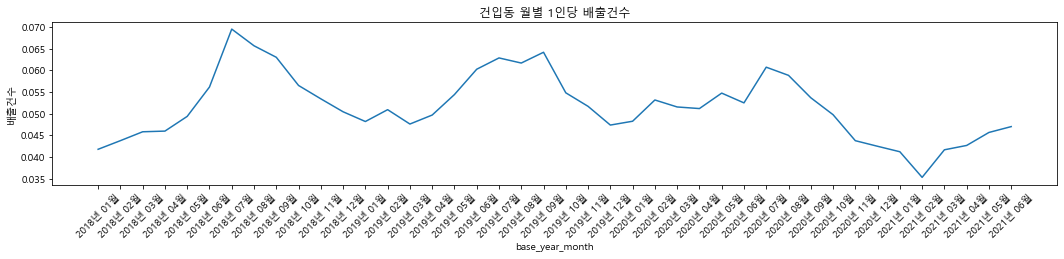

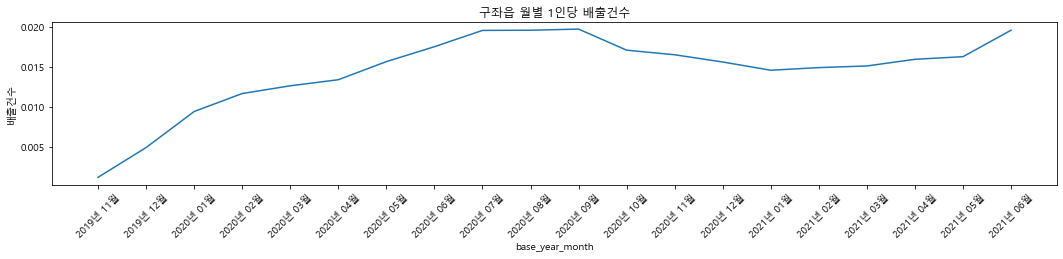

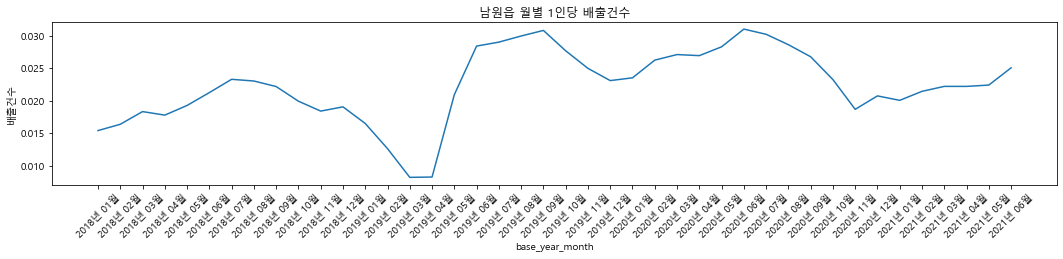

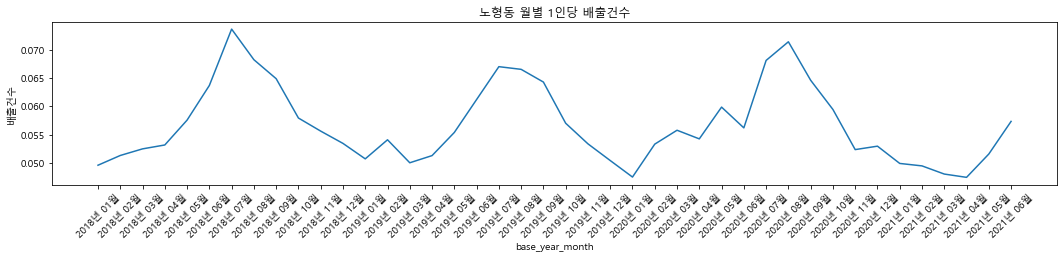

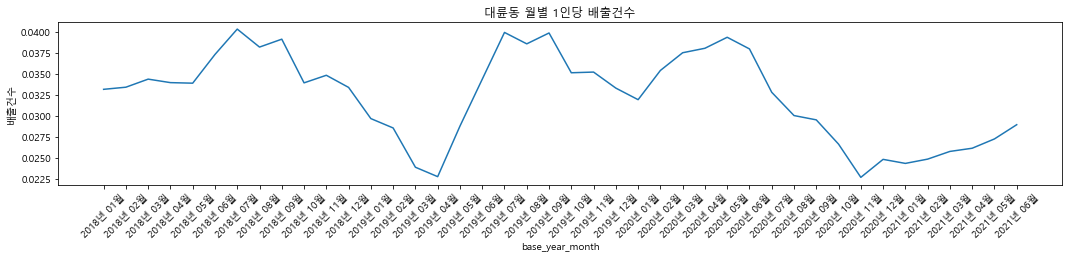

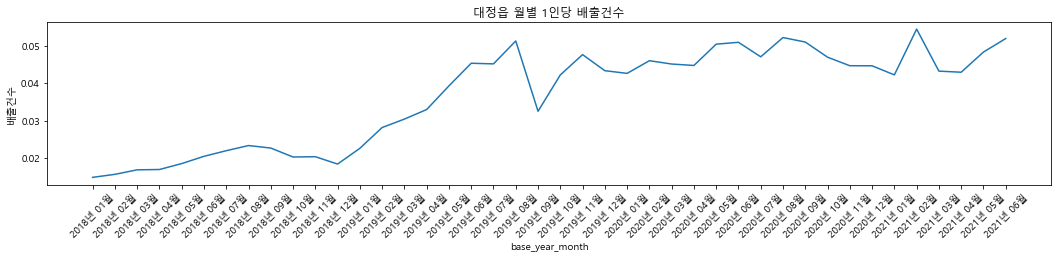

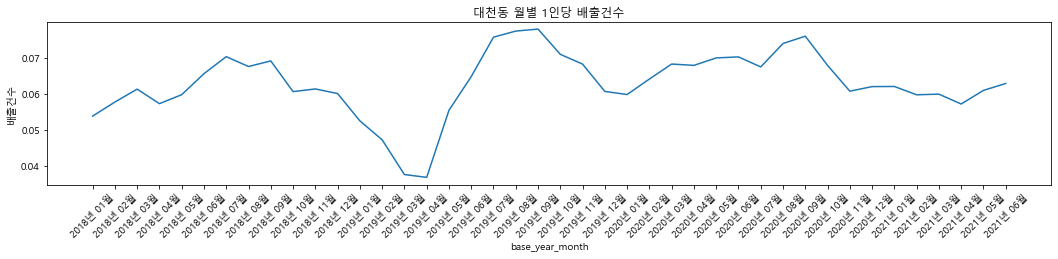

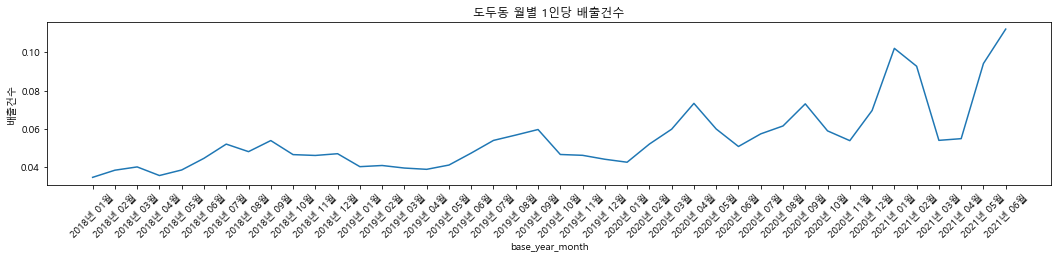

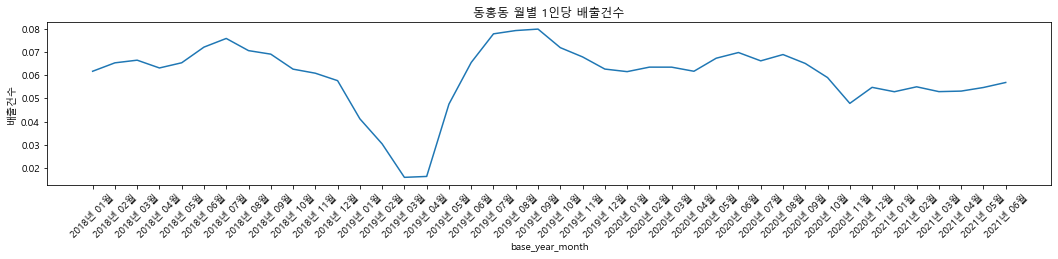

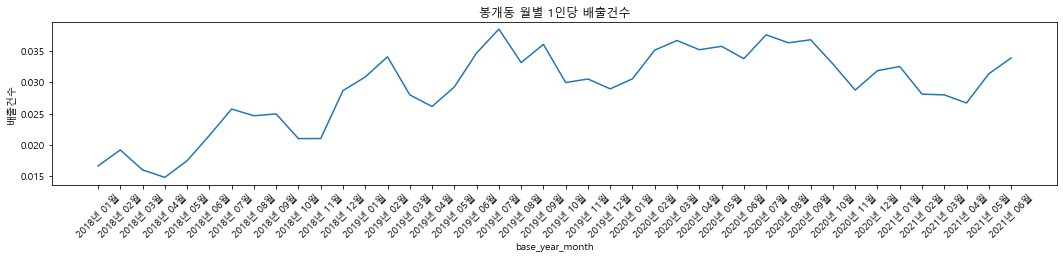

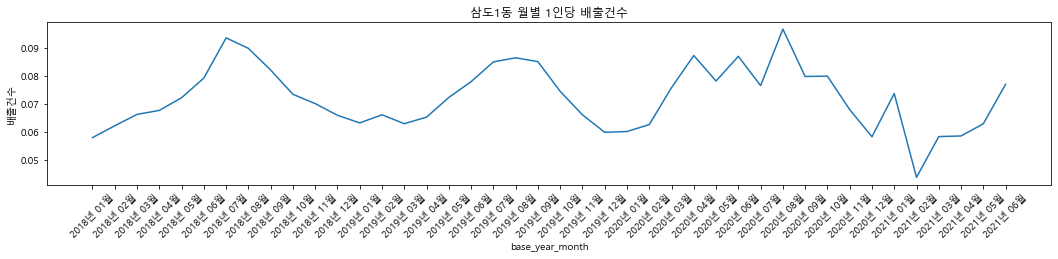

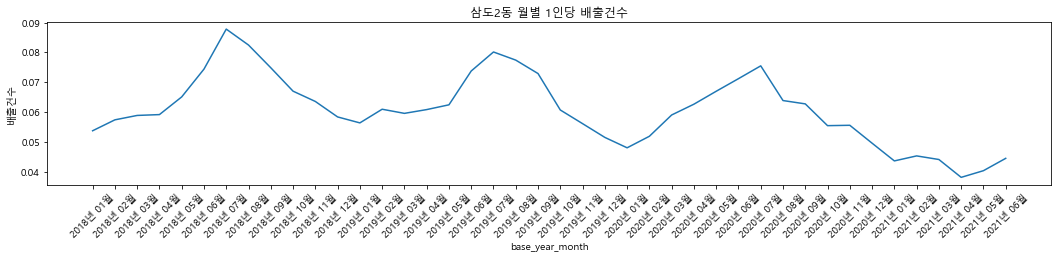

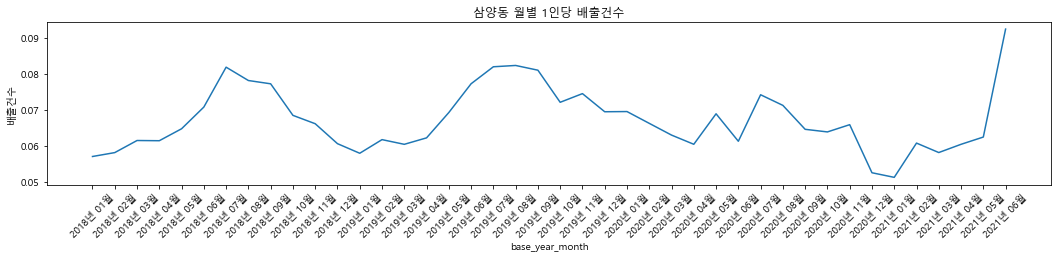

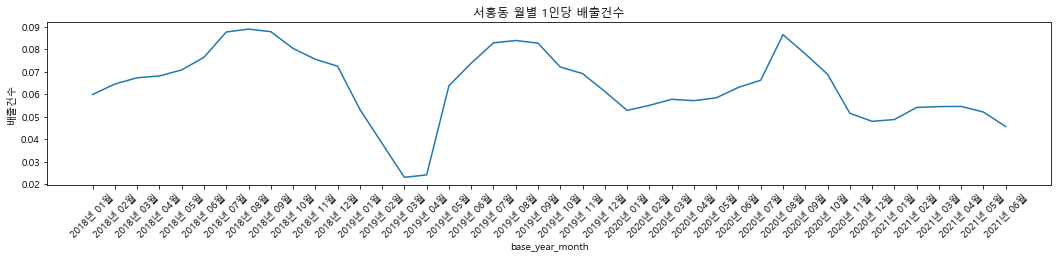

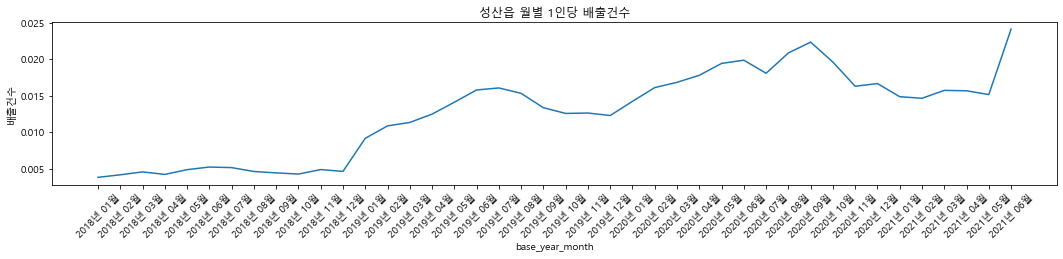

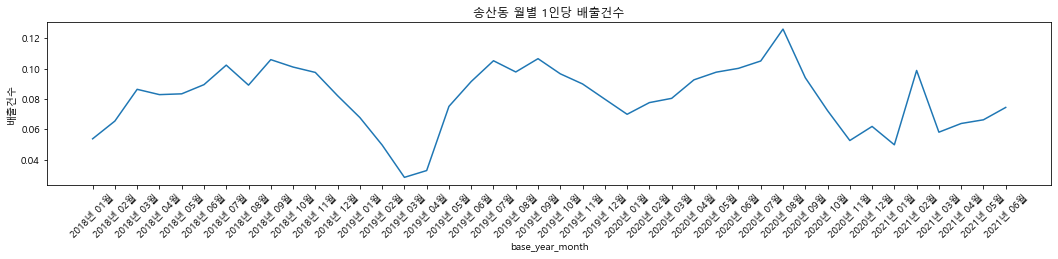

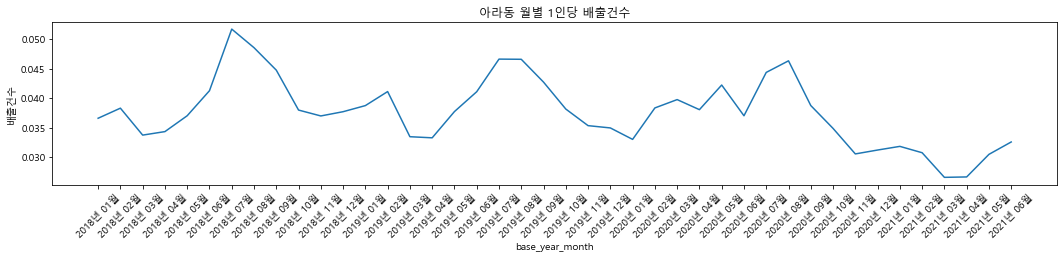

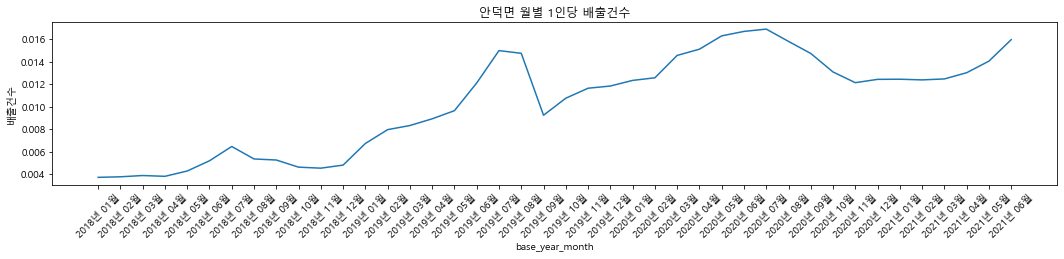

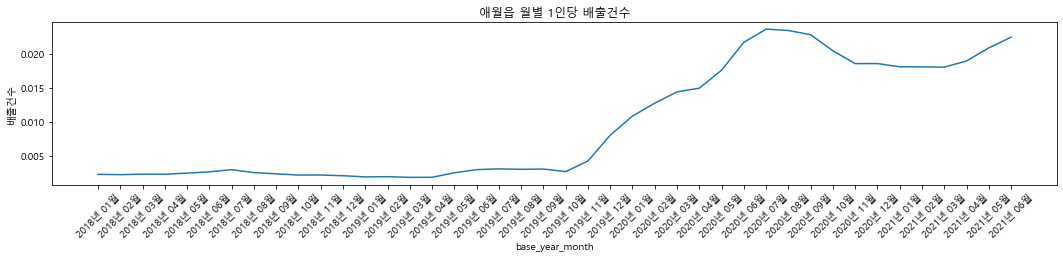

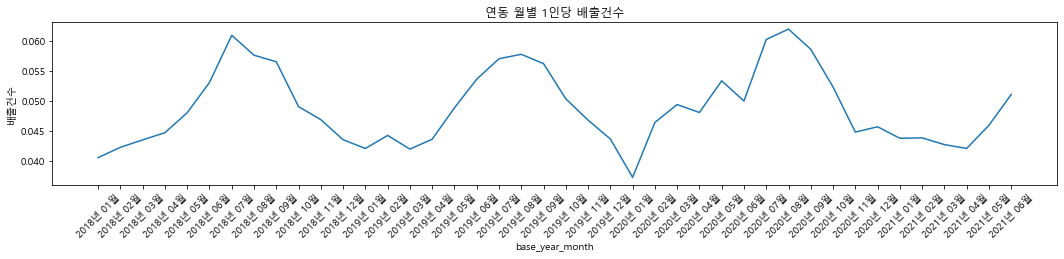

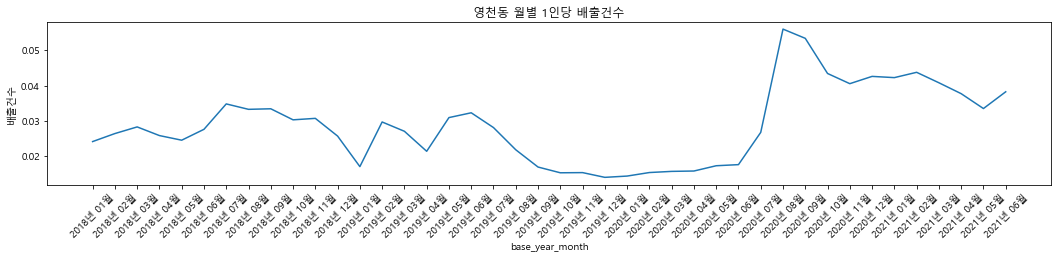

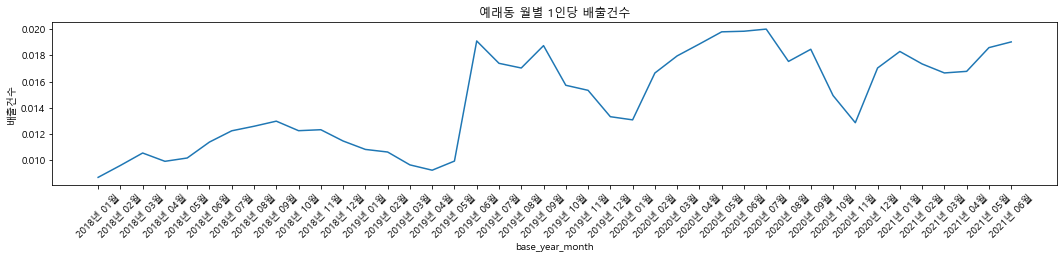

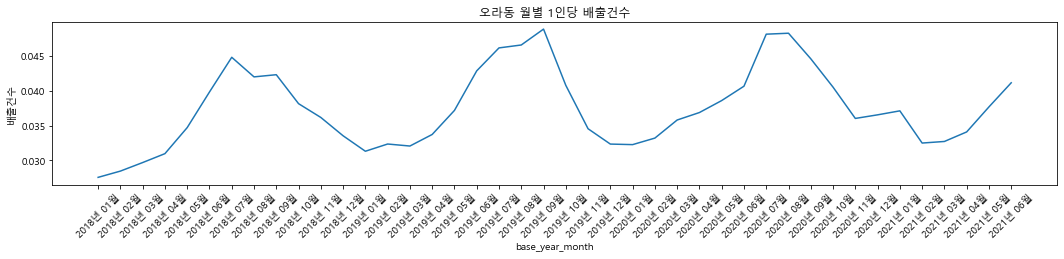

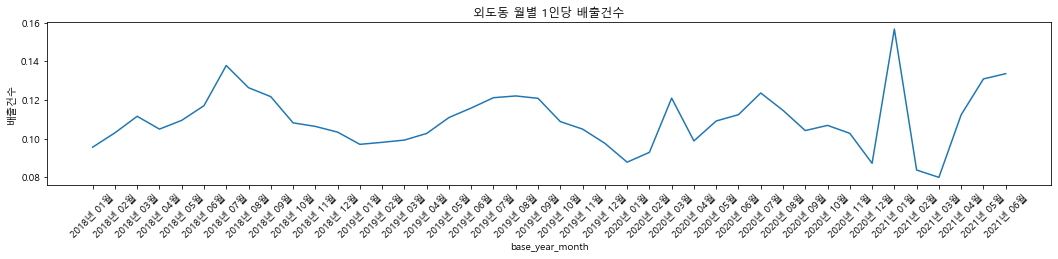

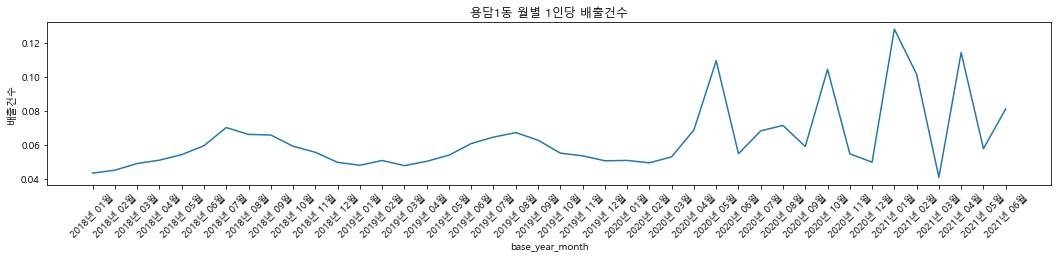

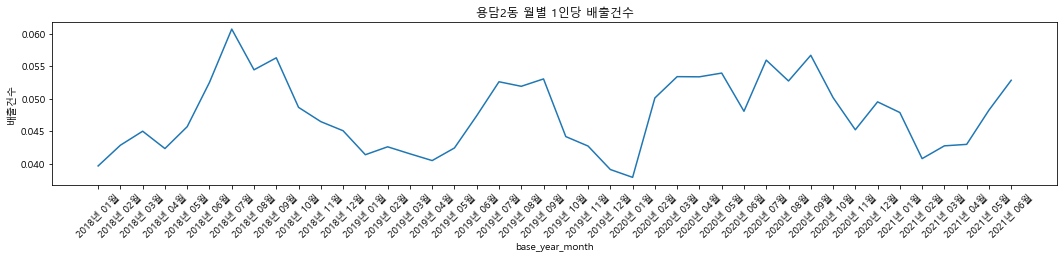

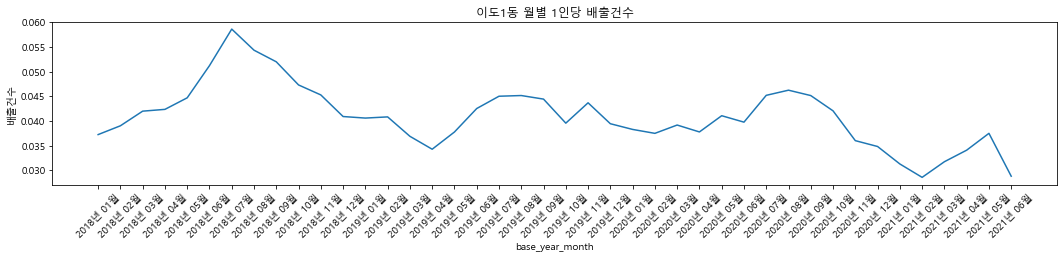

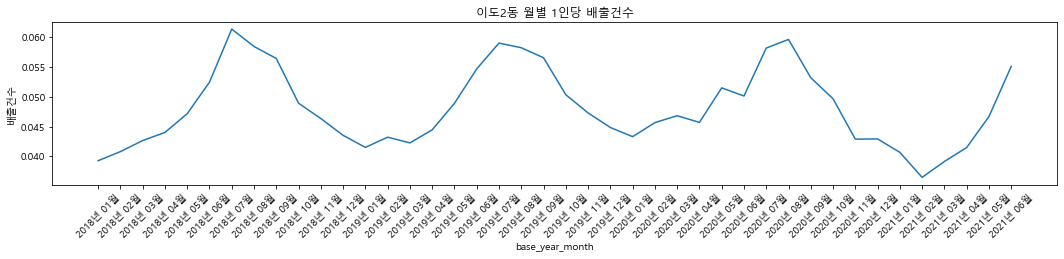

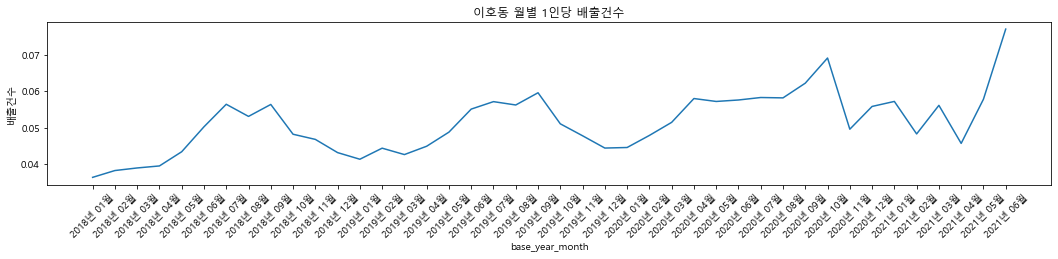

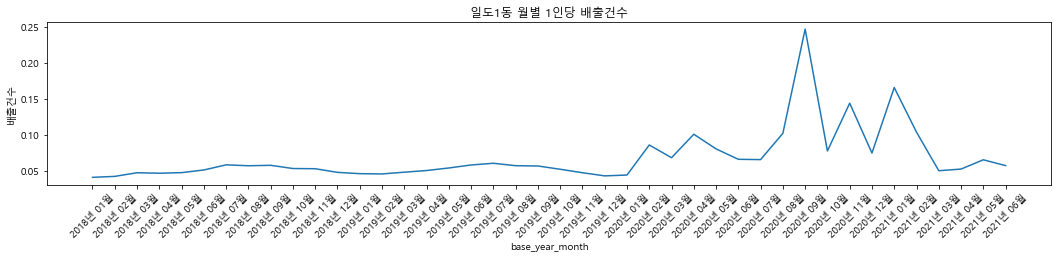

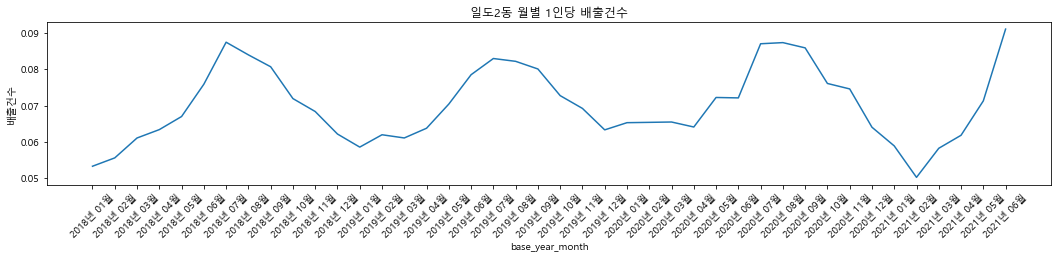

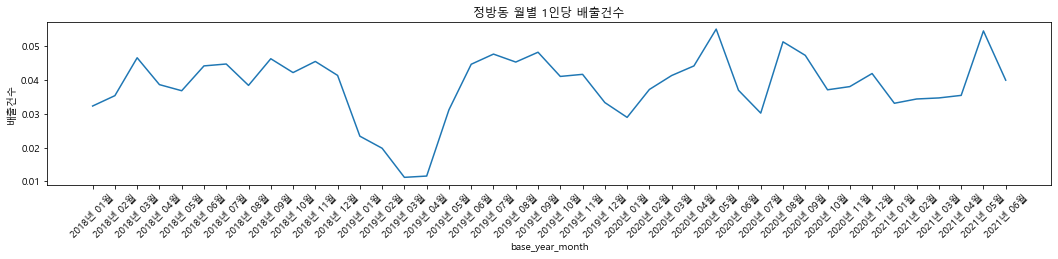

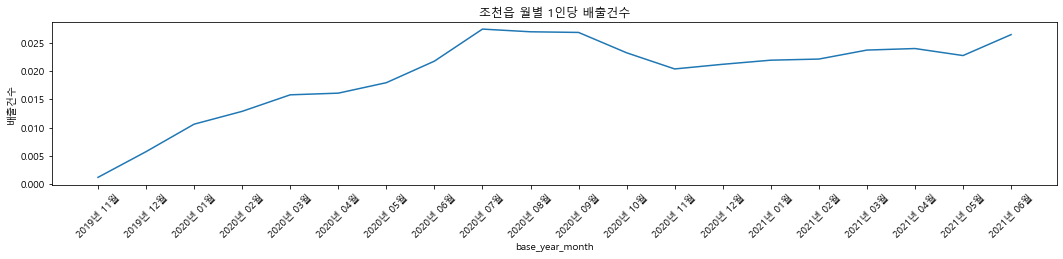

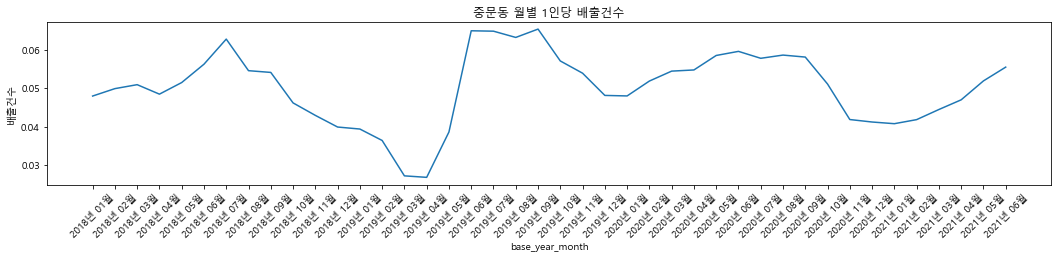

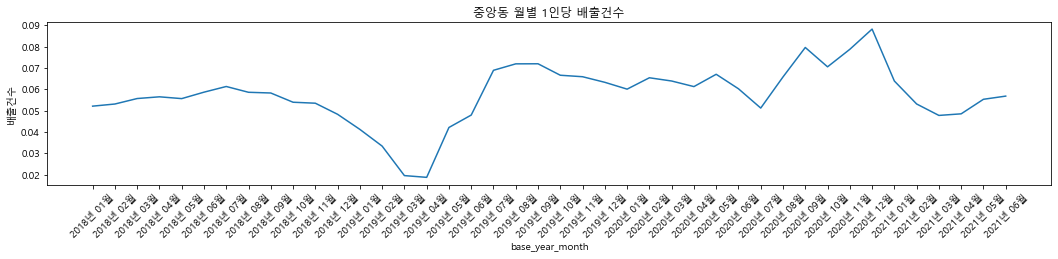

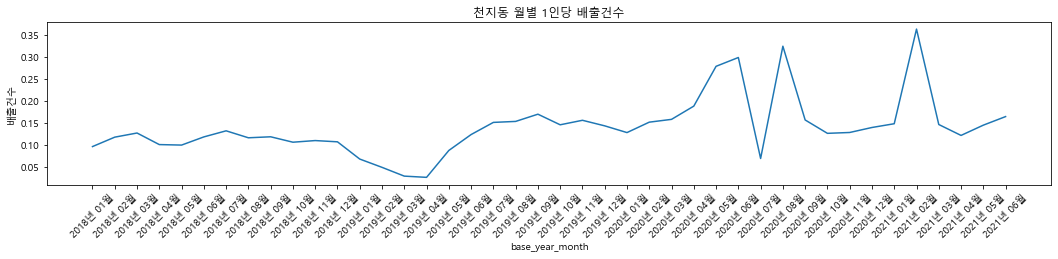

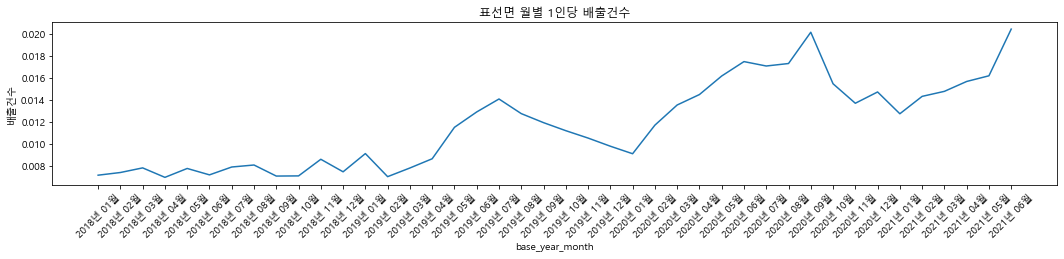

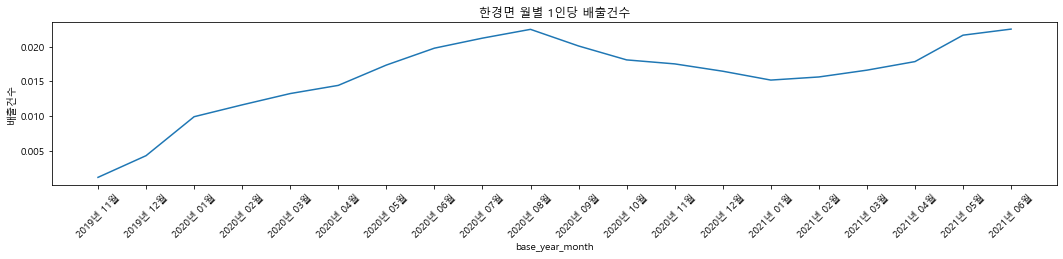

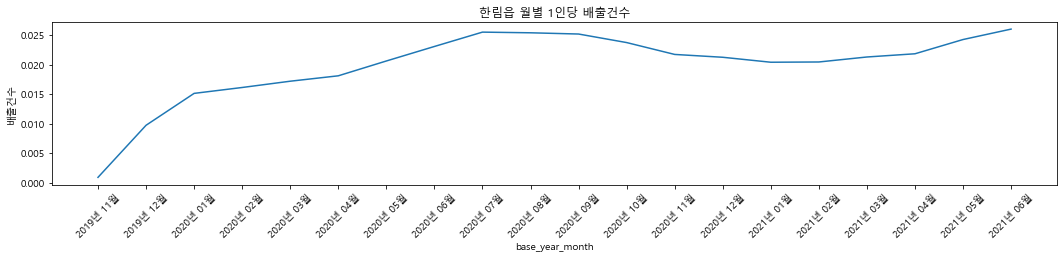

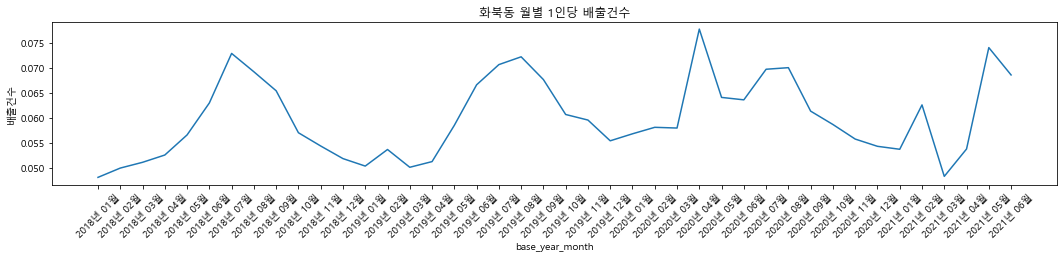

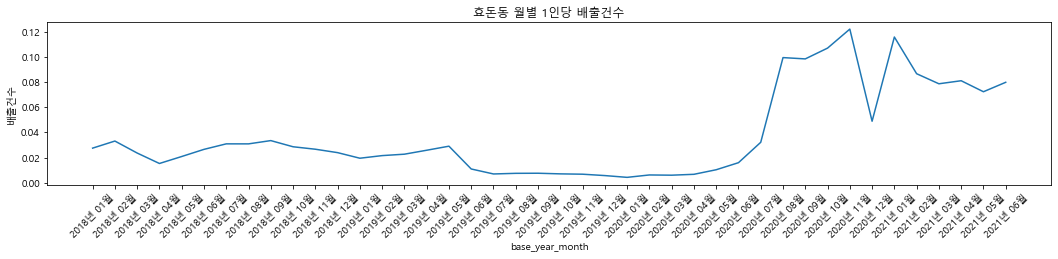

In [13]:
# 월/행정동별 1인당 배출건수
for i in range(len(dong_list)):
    dong = dong_list[i]
    
    plt.figure(figsize=(18, 3))
    
    sns.lineplot(data=foot_total_trash[foot_total_trash['emd_nm']==dong], x='base_year_month', y='em_cnt/total_foot')
    plt.xticks(rotation=45)
    plt.ylabel('배출건수')
    plt.title(dong + ' ' + '월별 1인당 배출건수')
    
    plt.show()

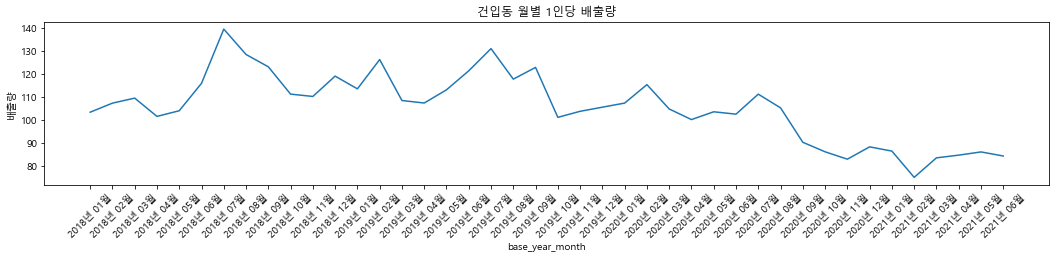

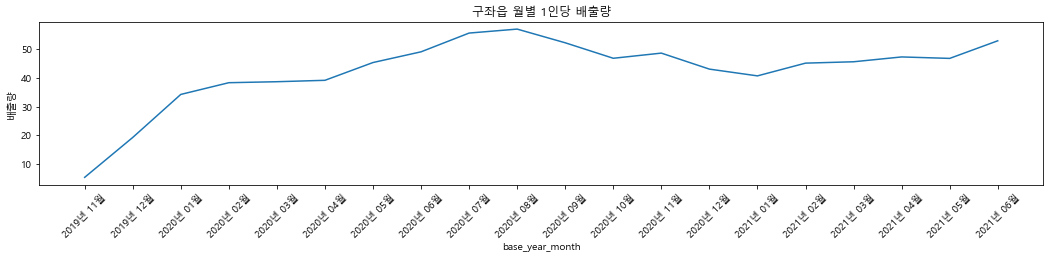

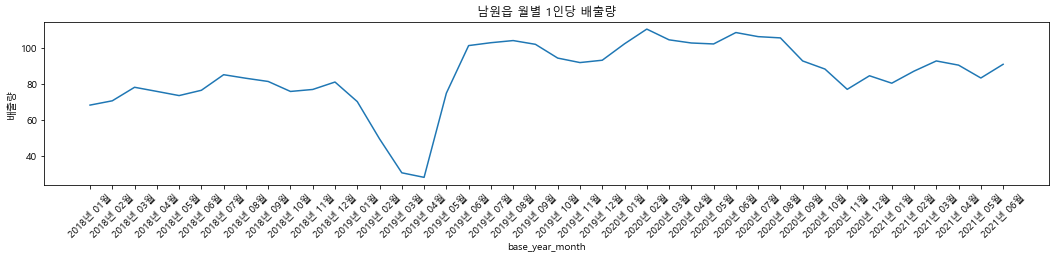

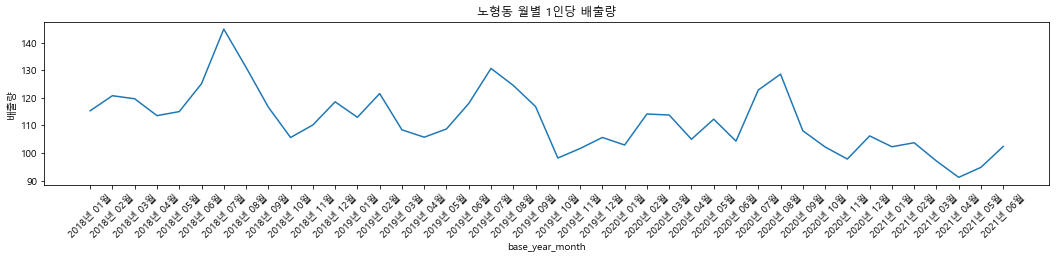

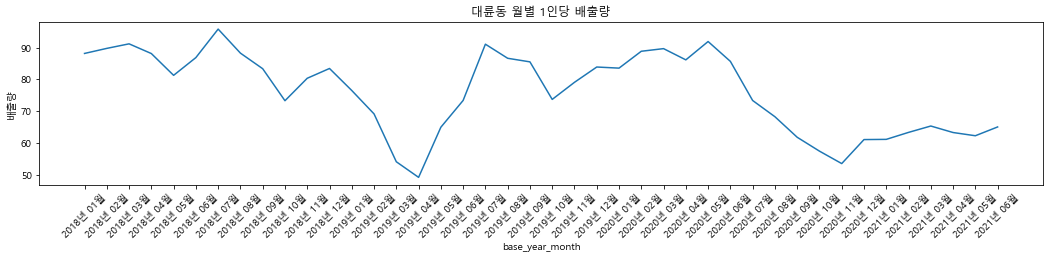

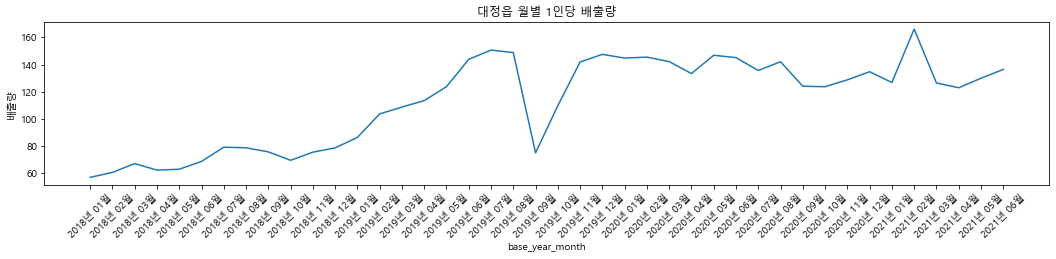

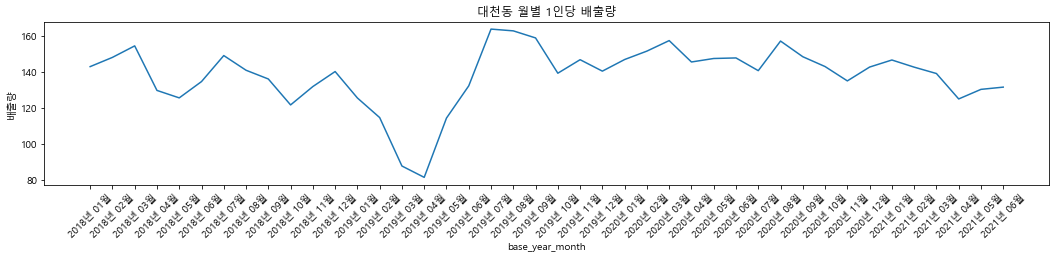

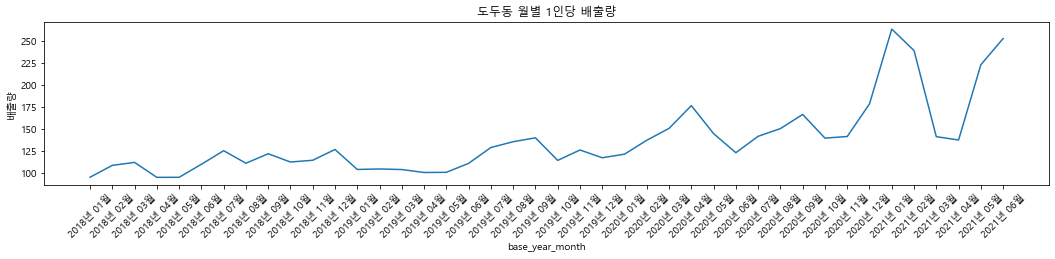

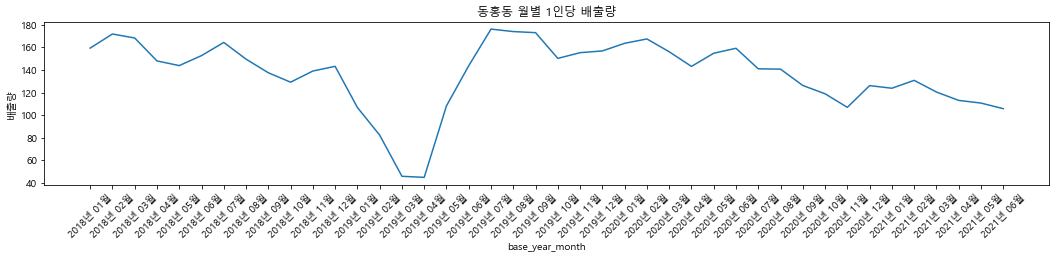

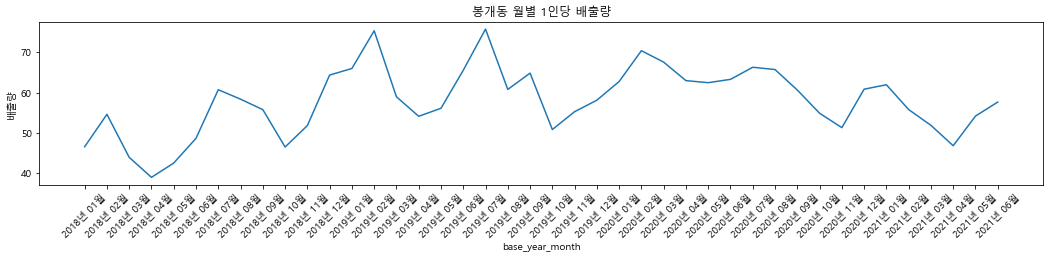

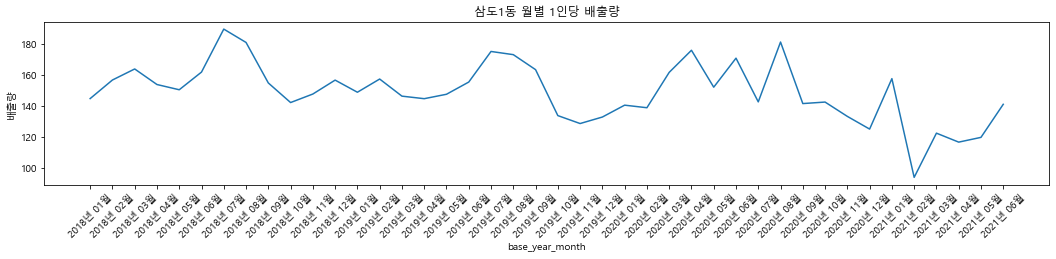

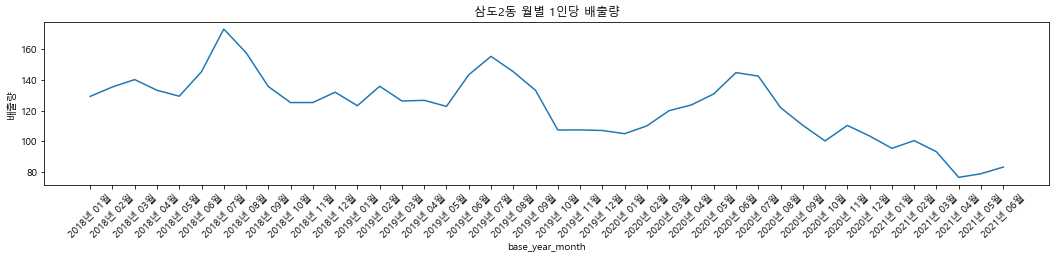

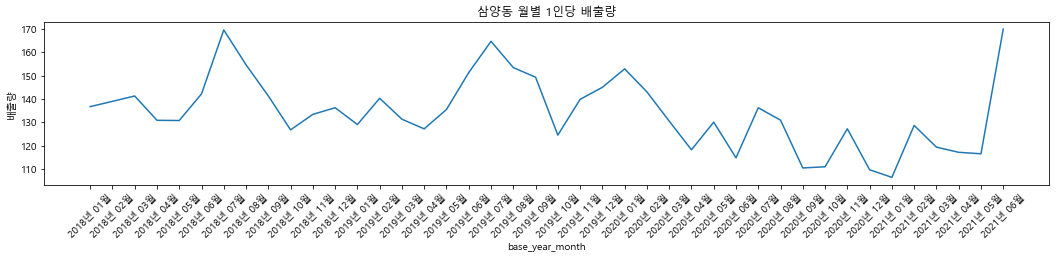

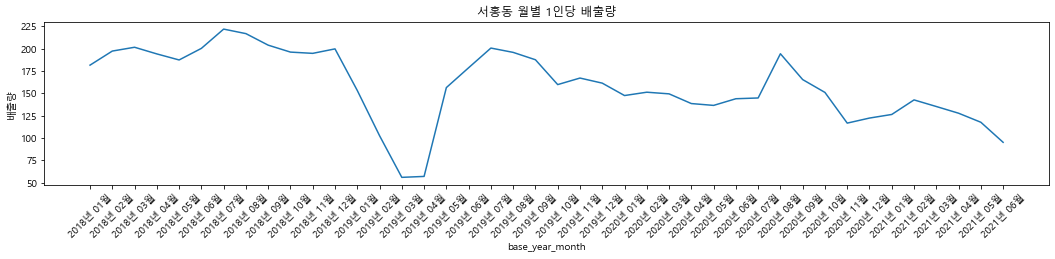

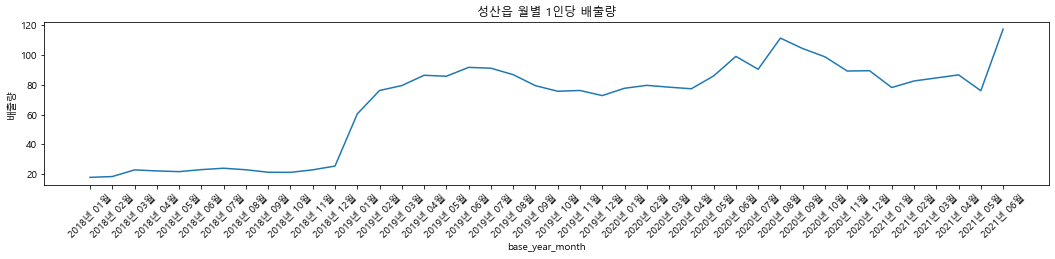

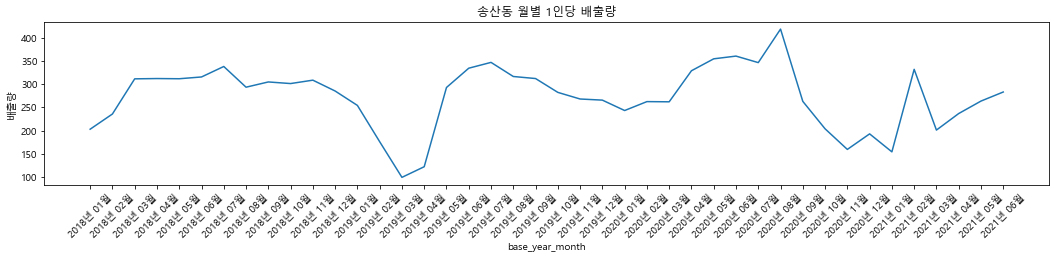

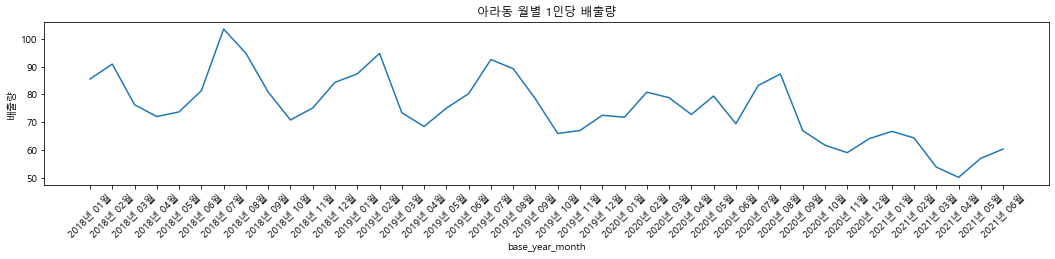

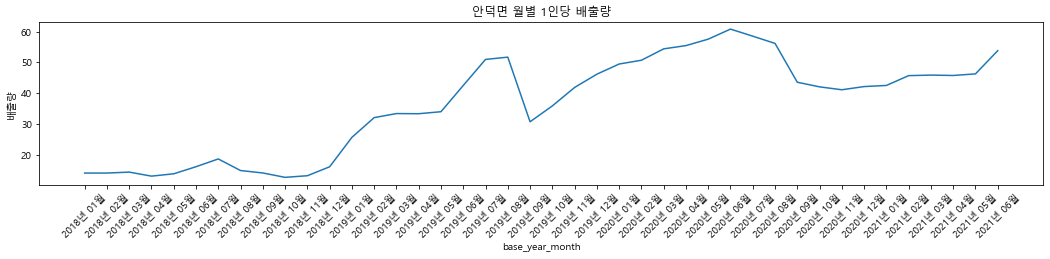

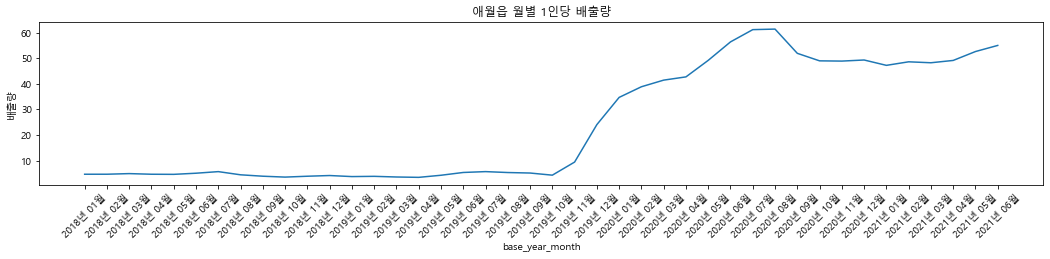

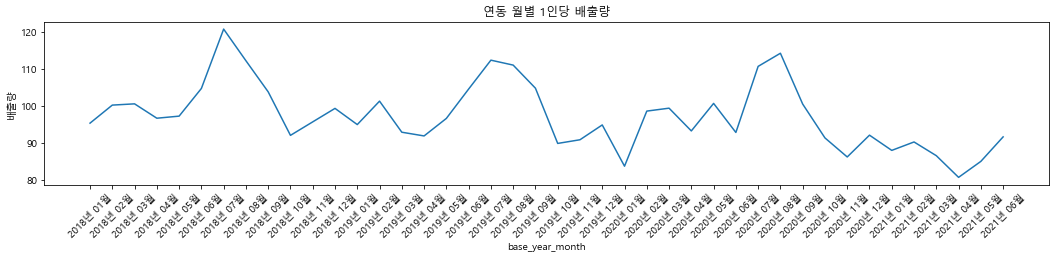

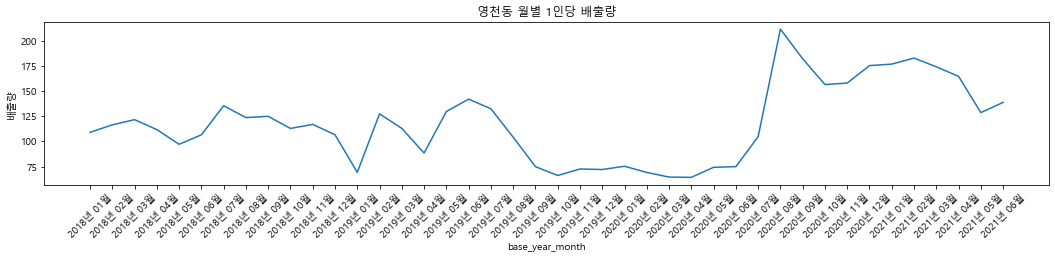

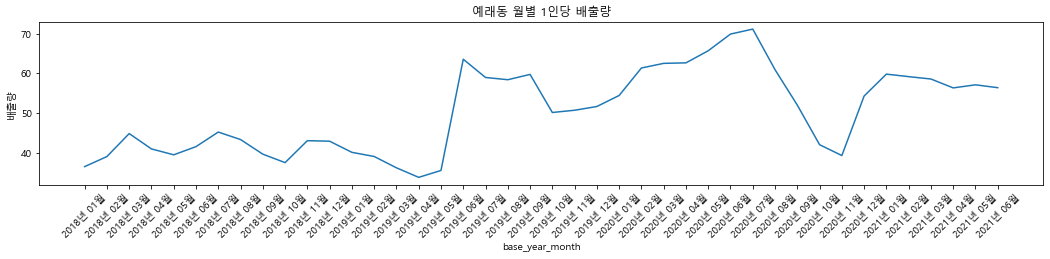

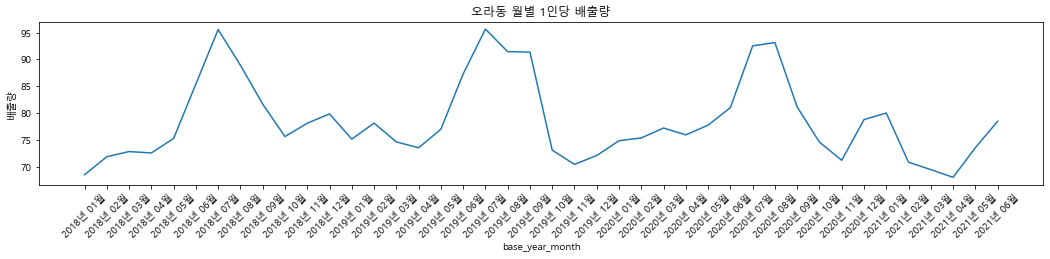

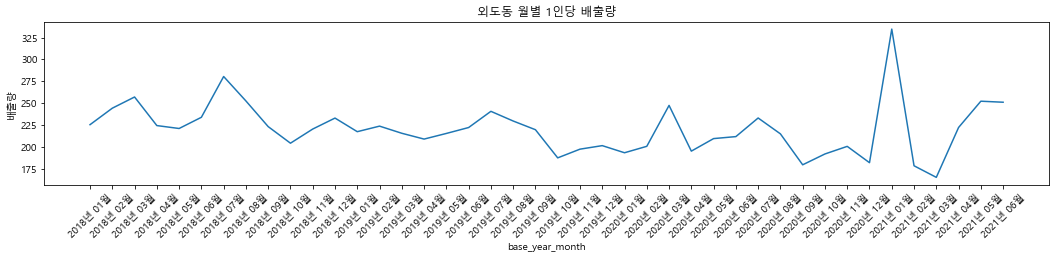

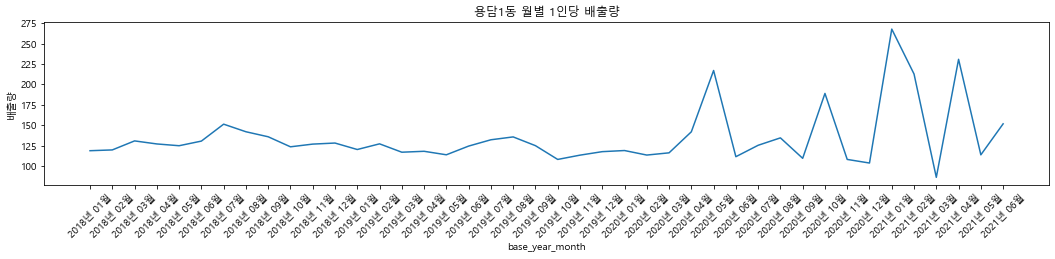

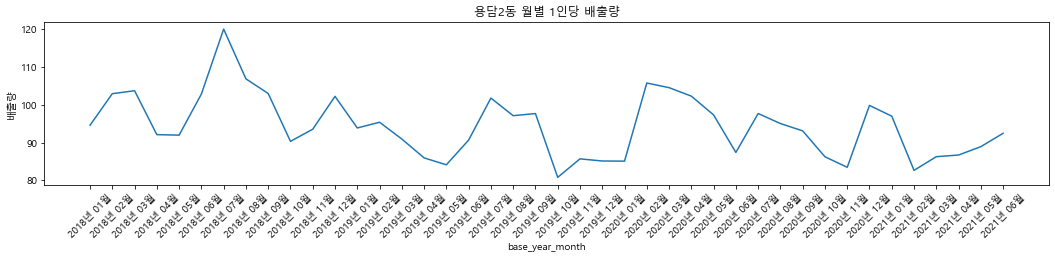

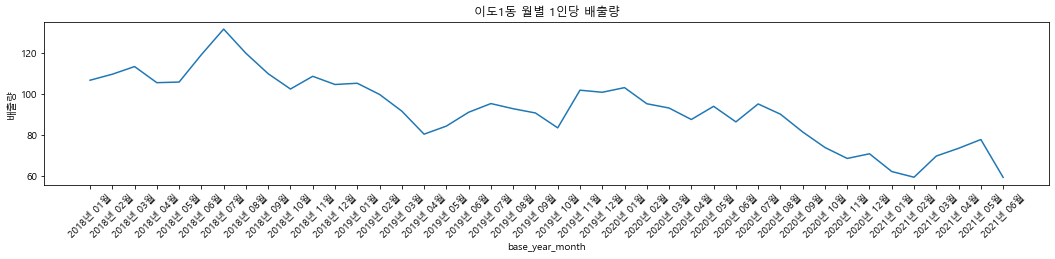

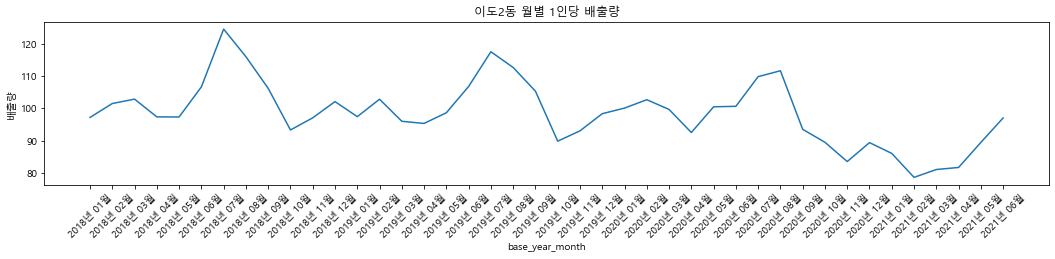

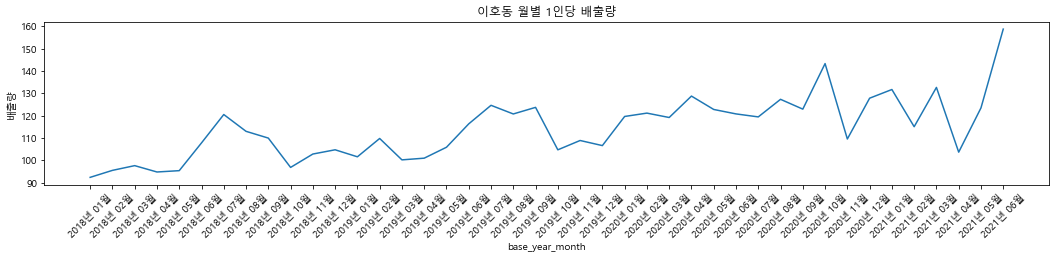

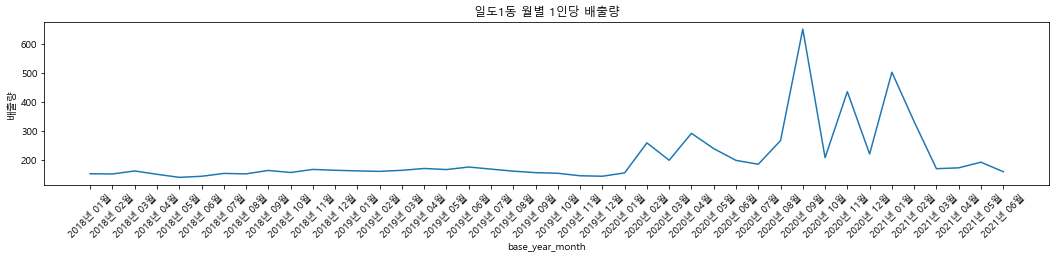

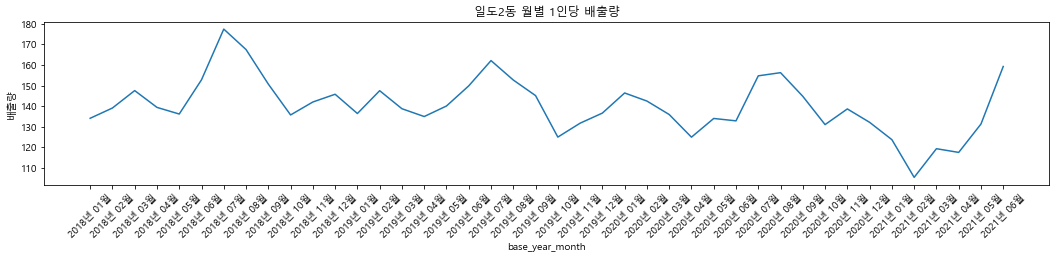

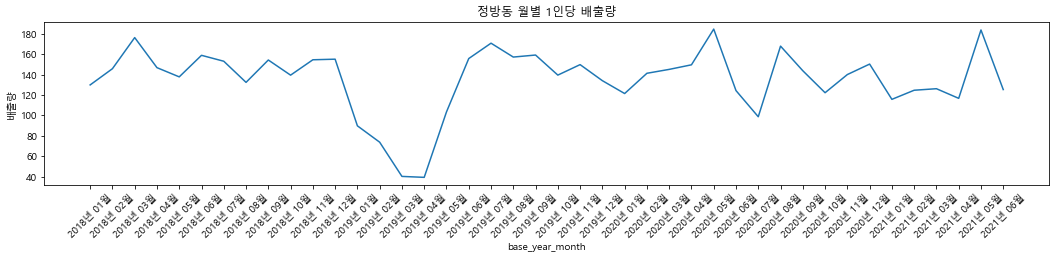

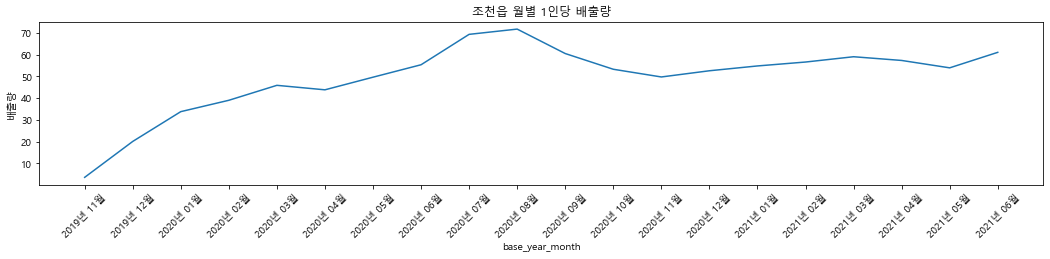

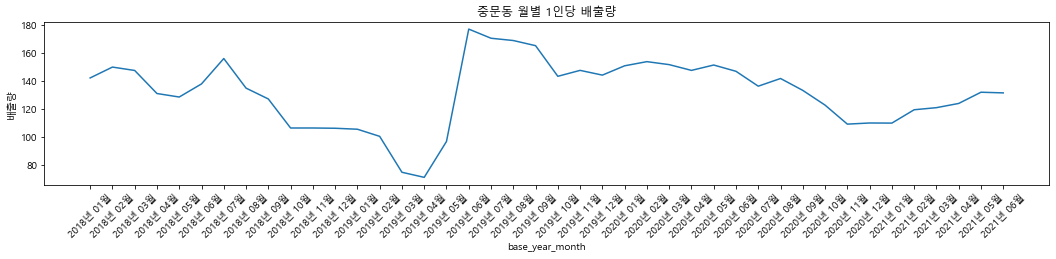

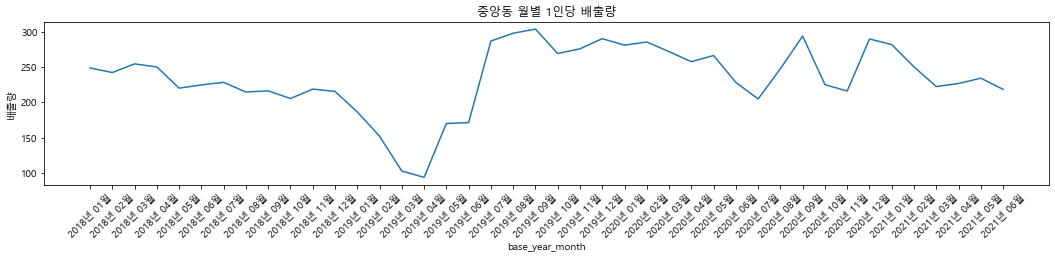

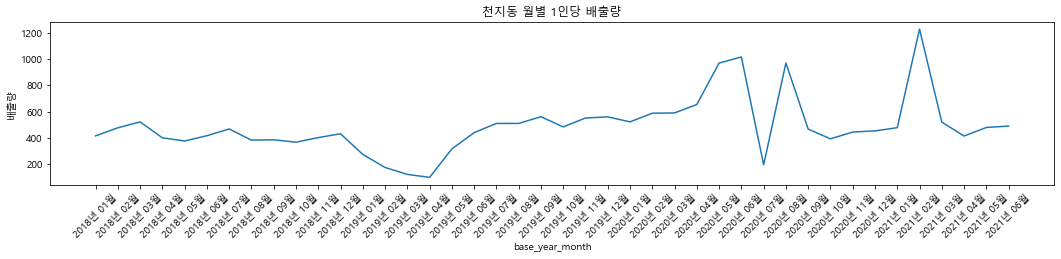

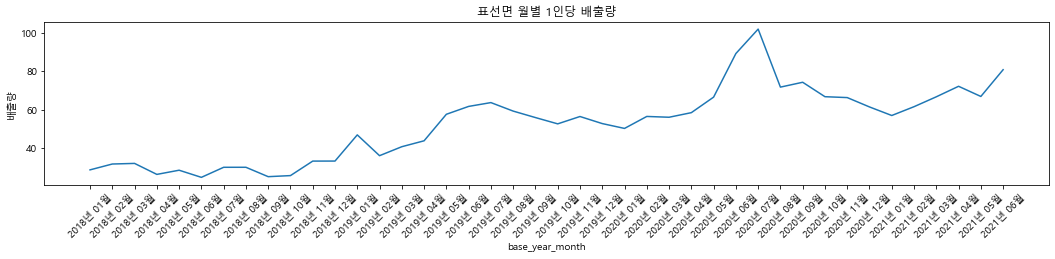

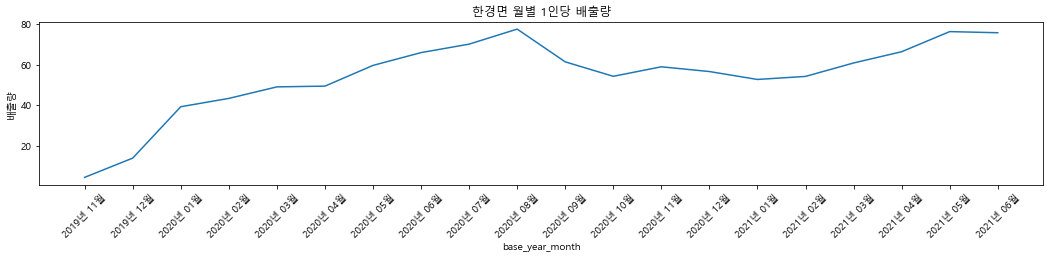

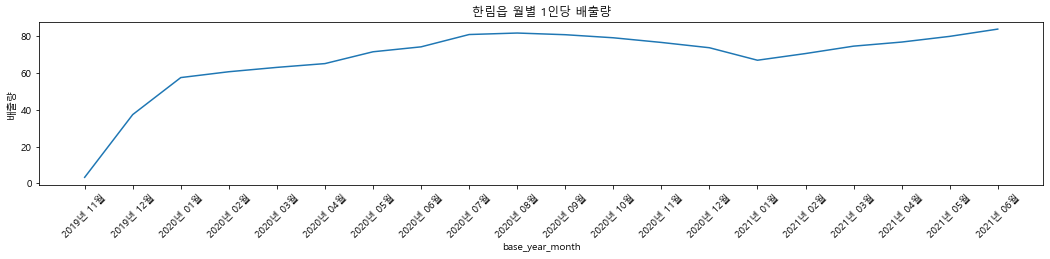

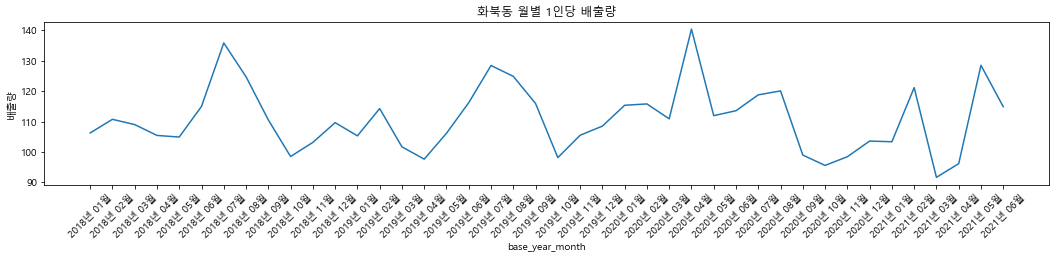

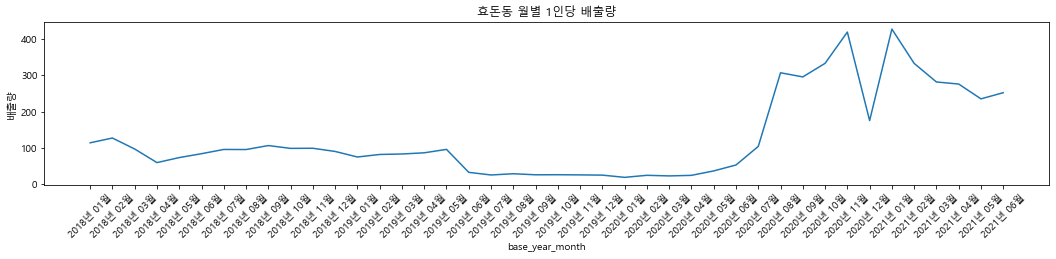

In [14]:
# 월/행정동별 1인당 배출량
for i in range(len(dong_list)):
    dong = dong_list[i]
    
    plt.figure(figsize=(18, 3))
    
    sns.lineplot(data=foot_total_trash[foot_total_trash['emd_nm']==dong], x='base_year_month', y='em_g/total_foot')
    plt.xticks(rotation=45)
    plt.ylabel('배출량')
    plt.title(dong + ' ' + '월별 1인당 배출량')
    
    plt.show()